# IMDB 电影评论分类

In [1]:
import numpy as np

from keras import models
from keras import layers

from keras.datasets import imdb

Using TensorFlow backend.


In [45]:
COMMON_WORDS_NUM = 10000
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=COMMON_WORDS_NUM)

In [40]:
word_index = imdb.get_word_index()
index_word = {index: word for word, index in word_index.items()}

def decode_review(review_indexs):
    review = ' '.join([index_word.get(index, '?') for index in review_indexs])
    return review

decode_review(train_data[0])

"the as you with out themselves powerful lets loves their becomes reaching had journalist of lot from anyone to have after out atmosphere never more room and it so heart shows to years of every never going and help moments or of every chest visual movie except her was several of enough more with is now current film as you of mine potentially unfortunately of you than him that with out themselves her get for was camp of you movie sometimes movie that with scary but and to story wonderful that in seeing in character to of 70s musicians with heart had shadows they of here that with her serious to have does when from why what have critics they is you that isn't one will very to as itself with other and in of seen over landed for anyone of and br show's to whether from than out themselves history he name half some br of and odd was two most of mean for 1 any an boat she he should is thought frog but of script you not while history he heart to real at barrel but when from one bit then have t

## 样本向量化

In [60]:
def vectorize_reviews(reviews, dim=COMMON_WORDS_NUM):
    results = np.zeros((len(reviews), dim))
    for i, review in enumerate(reviews):
        results[i, review] = 1
    return results

x_train = vectorize_reviews(train_data)
x_test = vectorize_reviews(test_data)

print(x_train[0])

y_train = train_labels.astype(np.float32)
y_test = test_labels.astype(np.float32)

[0. 1. 1. ... 0. 0. 0.]


## 留出验证集

In [64]:
VALIDATION_SET_NUM = 10000

x_train_ = x_train[VALIDATION_SET_NUM:]
x_val = x_train[:VALIDATION_SET_NUM]
y_train_ = y_train[VALIDATION_SET_NUM:]
y_val = y_train[:VALIDATION_SET_NUM]

In [66]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(COMMON_WORDS_NUM,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', 
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train_, y_train_, epochs=20, batch_size=512,
                    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 135us/step - loss: 0.5116 - acc: 0.7911 - val_loss: 0.3914 - val_acc: 0.8686
Epoch 2/20
15000/15000 [==============================] - 2s 105us/step - loss: 0.3134 - acc: 0.9018 - val_loss: 0.3101 - val_acc: 0.8876
Epoch 3/20
15000/15000 [==============================] - 2s 101us/step - loss: 0.2286 - acc: 0.9257 - val_loss: 0.2814 - val_acc: 0.8891
Epoch 4/20
15000/15000 [==============================] - 2s 102us/step - loss: 0.1807 - acc: 0.9422 - val_loss: 0.2738 - val_acc: 0.8902
Epoch 5/20
15000/15000 [==============================] - 2s 102us/step - loss: 0.1464 - acc: 0.9522 - val_loss: 0.2846 - val_acc: 0.8870
Epoch 6/20
15000/15000 [==============================] - 2s 106us/step - loss: 0.1222 - acc: 0.9621 - val_loss: 0.2903 - val_acc: 0.8871
Epoch 7/20
15000/15000 [==============================] - 2s 107us/step - loss: 0.1030 - acc: 0.9683 - val_loss: 0.3037 - 

In [67]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

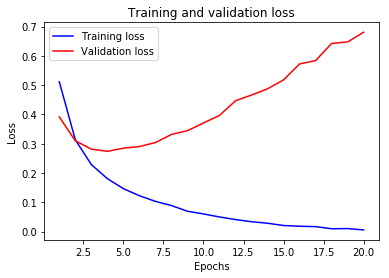

In [75]:
import matplotlib.pyplot as plt

history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

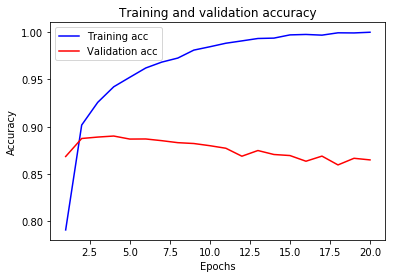

In [76]:
acc = history_dict['acc']
val_acc = history_dict['val_acc']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

> 从上图可以看出迭代到第3或4轮达到最佳值，这属于过拟合。

## 下面测试迭代4次的方案

In [77]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(COMMON_WORDS_NUM,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', 
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train_, y_train_, epochs=4, batch_size=512,
                    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/4
15000/15000 [==============================] - 2s 140us/step - loss: 0.5316 - acc: 0.7745 - val_loss: 0.4021 - val_acc: 0.8750
Epoch 2/4
15000/15000 [==============================] - 2s 107us/step - loss: 0.3252 - acc: 0.8995 - val_loss: 0.3255 - val_acc: 0.8791
Epoch 3/4
15000/15000 [==============================] - 2s 104us/step - loss: 0.2362 - acc: 0.9273 - val_loss: 0.2817 - val_acc: 0.8918
Epoch 4/4
15000/15000 [==============================] - 2s 106us/step - loss: 0.1827 - acc: 0.9410 - val_loss: 0.2940 - val_acc: 0.8830


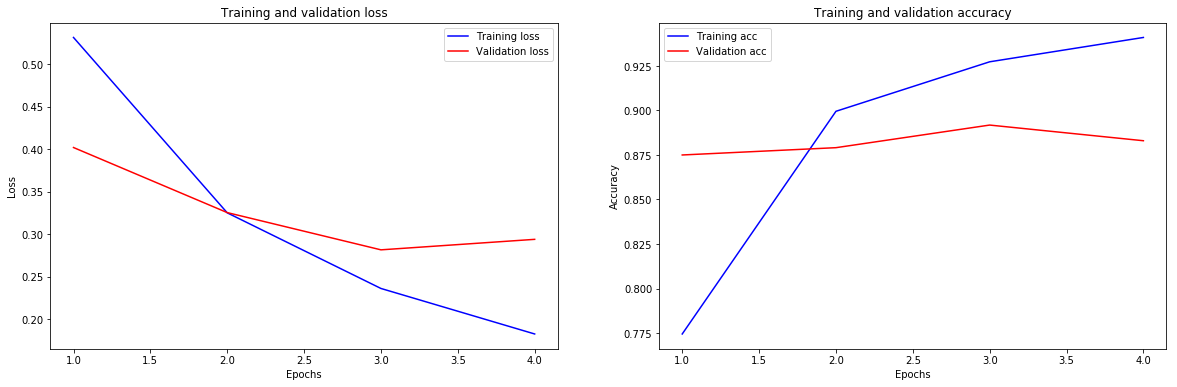

In [87]:
import matplotlib.pyplot as plt

history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']
acc = history_dict['acc']
val_acc = history_dict['val_acc']

epochs = range(1, len(loss) + 1)

plt.figure(figsize=(20, 6)) 

plt.subplot(1, 2, 1)
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [88]:
results = model.evaluate(x_test, y_test)
print(results)

25000/25000 [==============================] - 3s 111us/step
[0.31768125289916993, 0.87144]


In [89]:
model.predict(x_test)

array([[0.1809891 ],
       [0.99174035],
       [0.7945669 ],
       ...,
       [0.07107878],
       [0.07289574],
       [0.40250167]], dtype=float32)